# Study Roommate's Snores with FFT

### Wenjie Chen
### Oct. 17th, 2018

## 1. Read and Process Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Read data
datablock = []
with open('Roommate_s Snores Recording 1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    line_num = 0
    for row in spamreader:
        if line_num == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            datablock.append([float(row[0]), float(row[1])])
        line_num = line_num + 1
    print(f'Processed {line_num} lines.')

Column names are relative_time, DecibelSource
Processed 1503 lines.


In [3]:
# Process data
datablock = np.transpose(np.array(datablock))
(t, I) = (datablock[0], datablock[1]) # t is time (ms), I is sound intensity (dB).

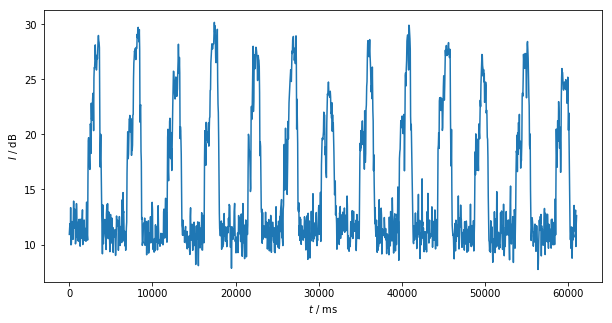

In [4]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(t, I)
plt.xlabel("$t$ / ms")
plt.ylabel("$I$ / dB")
plt.show()

## 2. Fourier Transformation

In [5]:
# Fast fourier transform
N = len(t)
A = np.fft.fft(I) / N
f = np.fft.fftfreq(t.shape[-1], t[1])
f = f[range(int(N/2))]
A = A[range(int(N/2))]

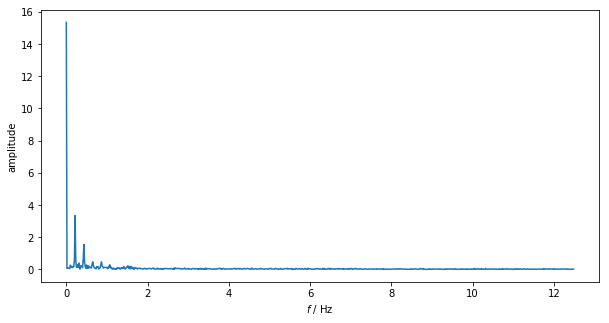

In [6]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f * 1000, np.absolute(A))
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

## 3. Data Interpretation

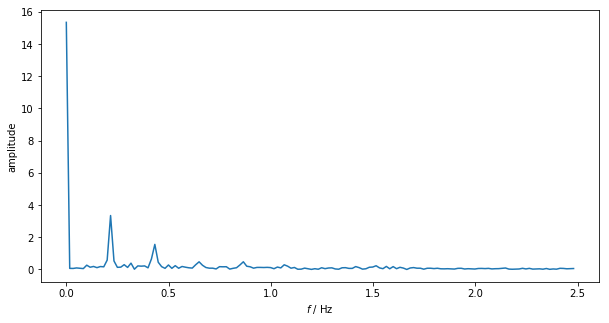

In [7]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f[0:150] * 1000, np.absolute(A[0:150]))
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

In [8]:
# Interpretation
A_norm = np.absolute(A)
[index] = [i for i, j in enumerate(A_norm) if j == max(A_norm[1:50])]
snore_per_minute = 60 * (f[index] * 1000)
print(f'My roommate snores {snore_per_minute} times per minute.')

My roommate snores 12.982689747003993 times per minute.
